In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [18]:
df = pd.read_csv(r"C:\Users\priya\OneDrive\Desktop\Copy of Online Retail.csv",encoding="ISO-8859-1")  # Adjust path
print("Dataset Loaded:")
print(df.head())


Dataset Loaded:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom  


In [20]:
df = df.dropna(subset=['CustomerID'])

# Remove negative quantity rows (returns)
df = df[df['Quantity'] > 0]

# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],dayfirst=True)


In [21]:
latest_date = df['InvoiceDate'].max()  # Use max date as reference

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                 # Frequency
    'TotalPrice': 'sum'                                     # Monetary
}).reset_index()

rfm.columns = ['CustomerID','Recency','Frequency','Monetary']

print("\nRFM Table Sample:")
print(rfm.head())


RFM Table Sample:
   CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        1          7   4310.00
2     12348.0       74          4   1797.24
3     12349.0       18          1   1757.55
4     12350.0      309          1    334.40


In [22]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])


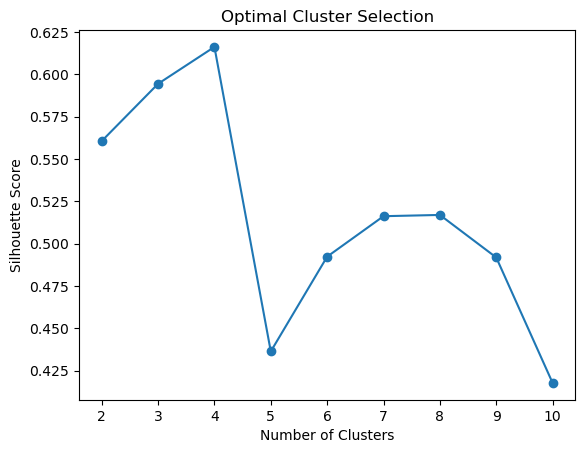


Cluster Distribution:
Cluster
0    2576
3     953
1     711
2      92
4       7
Name: count, dtype: int64


In [23]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    scores.append((k, score))

# Plot Silhouette scores
k_vals, s_scores = zip(*scores)
plt.plot(k_vals, s_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Optimal Cluster Selection")
plt.show()

# Choose best cluster number (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

print("\nCluster Distribution:")
print(rfm['Cluster'].value_counts())

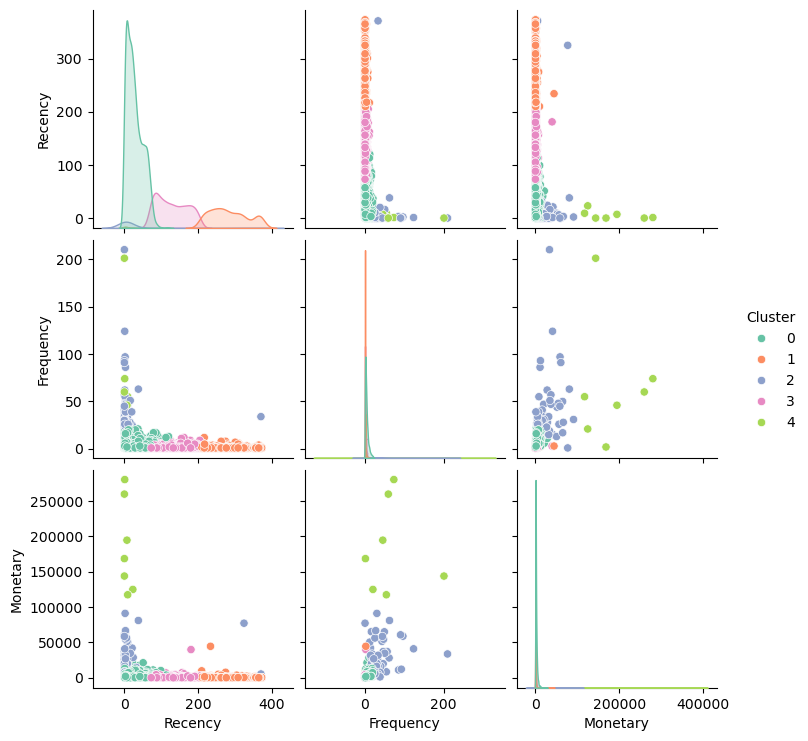

In [24]:
sns.pairplot(rfm, hue='Cluster', vars=['Recency','Frequency','Monetary'], palette='Set2')
plt.show()


In [25]:
rfm.to_csv("Online_Retail_Customer_Segmentation.csv", index=False)
print("\n✅ File Saved: Online_Retail_Customer_Segmentation.csv")



✅ File Saved: Online_Retail_Customer_Segmentation.csv
